We will use divorce data set for this lab. This dataset is about participants who completed the personal information form and a divorce predictors scale. The data is a modified version of the publicly available data at https://archive.ics.uci.edu/ml/datasets/Divorce+Predictors+data+set by injecting noise so you will not replicate the results on the UCI website. There are 170 participants and 54 attributes (or predictor variables) that are all real-valued. The dataset is named as divorce.csv. The last column of the CSV file is labeled y (1 means “divorce,” 0 means “no divorce”). Each column is for one feature (predictor variable), and each row is a sample (participant). A detailed explanation for each feature (predictor variable) is at the website link above.

Adding/injecting noise in the data: https://stackoverflow.com/questions/46093073/adding-gaussian-noise-to-a-dataset-of-floating-points-and-save-it-python

In [67]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
dv= pd.read_csv('divorce.csv', header = None)
dv.head(1)

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,1.560903,3.681587,3.450467,3.211998,-1.203045,0.597706,-0.970093,-0.75097,-0.511495,-0.13366,...,2.077401,1.184182,3.955069,2.608046,2.303629,1.72166,3.275018,1.761019,1.215237,1.0


## Problem 1 
Please load the divorce data that is in CSV form. Find a variable column that has the highest correlation ( in absolute value) with the last column.

In [32]:
dv.corr().abs()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,1.000000,0.629337,0.621865,0.668215,0.713537,0.156418,0.309688,0.673672,0.650798,0.529611,...,0.393299,0.459942,0.376348,0.501977,0.506272,0.405154,0.468476,0.461373,0.617680,0.769510
1,0.629337,1.000000,0.555301,0.586651,0.577675,0.012924,0.177948,0.577694,0.616259,0.500693,...,0.338308,0.471462,0.452490,0.518565,0.462195,0.393769,0.308205,0.361623,0.495953,0.710192
2,0.621865,0.555301,1.000000,0.561794,0.588388,0.080255,0.205396,0.543881,0.523437,0.550314,...,0.173617,0.375824,0.328897,0.391440,0.393154,0.257798,0.306391,0.334373,0.481710,0.629497
3,0.668215,0.586651,0.561794,1.000000,0.545779,0.148456,0.289739,0.531955,0.550433,0.501996,...,0.267101,0.380958,0.438455,0.436506,0.390058,0.311040,0.325486,0.343669,0.486226,0.678486
4,0.713537,0.577675,0.588388,0.545779,1.000000,0.115945,0.229785,0.661448,0.716370,0.528564,...,0.369597,0.501946,0.402510,0.585737,0.518217,0.407480,0.487391,0.549443,0.617160,0.769773
5,0.156418,0.012924,0.080255,0.148456,0.115945,1.000000,0.211298,0.102439,0.191429,0.124942,...,0.002373,0.119324,0.011807,0.049360,0.075585,0.024669,0.117830,0.102393,0.218707,0.263437
6,0.309688,0.177948,0.205396,0.289739,0.229785,0.211298,1.000000,0.319566,0.384934,0.330206,...,0.082463,0.101148,0.073320,0.138429,0.135536,0.079145,0.118457,0.108002,0.203898,0.369575
7,0.673672,0.577694,0.543881,0.531955,0.661448,0.102439,0.319566,1.000000,0.713403,0.590608,...,0.398054,0.430986,0.349871,0.421554,0.476872,0.394380,0.445487,0.465020,0.544424,0.752230
8,0.650798,0.616259,0.523437,0.550433,0.716370,0.191429,0.384934,0.713403,1.000000,0.595371,...,0.348234,0.487345,0.372947,0.444726,0.486275,0.389999,0.465280,0.414174,0.585966,0.803583
9,0.529611,0.500693,0.550314,0.501996,0.528564,0.124942,0.330206,0.590608,0.595371,1.000000,...,0.253860,0.360979,0.330106,0.422896,0.402636,0.322821,0.377323,0.385538,0.518220,0.666084


Variable 39 has the highest correlation with variable 54.

### Problem 2 
Train a regression model with the last column as a dependent variable and the column you found in problem 1 as an independent variable. Report the summary, confusion matric, and the accuracy of the model.

In [33]:
y = dv[54]
x = dv[39]
x = sm.add_constant(x)

In [34]:
model = sm.OLS(y,x)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     54   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     420.9
Date:                Thu, 21 Oct 2021   Prob (F-statistic):           1.27e-47
Time:                        16:35:15   Log-Likelihood:                -16.760
No. Observations:                 170   AIC:                             37.52
Df Residuals:                     168   BIC:                             43.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0779      0.029      2.695      0.008       0.021       0.135
39             0.2084      0.010     20.516      0.000       0.188       0.228
==============================================================================
Omnibus:                        0.961   Durbin-Watson:                   1.485
Prob(Omnibus):                  0.618   Jarque-Bera (JB):                0.826
Skew:                           0.171   Prob(JB):                        0.662
Kurtosis:                       3.008   Cond. No.                         4.25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
ypred = result.predict(sm.add_constant(x))
ypred

0      0.814473
1      1.014929
2      0.770936
3      0.798760
4      0.457047
         ...   
165    0.195548
166    0.104093
167    0.521823
168    0.347331
169   -0.186939
Length: 170, dtype: float64

In [36]:
round(ypred)

0      1.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
165    0.0
166    0.0
167    1.0
168    0.0
169   -0.0
Length: 170, dtype: float64

In [37]:
ypred.loc[ypred <= 0.5] = 0
ypred.loc[ypred >0.5] = 1
ypred

0      1.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
165    0.0
166    0.0
167    1.0
168    0.0
169    0.0
Length: 170, dtype: float64

In [38]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
165    0.0
166    0.0
167    0.0
168    0.0
169    0.0
Name: 54, Length: 170, dtype: float64

In [39]:
confusion_matrix(y, ypred)

array([[82,  4],
       [ 6, 78]])

In [40]:
(82+78) / (82+78+6+4)

0.9411764705882353

### Problem 3
Now split the data in problem 2 to training and testing following the 80%, 20%  rule. Make sure to add a random state when using training and testing split function so that the testing and training data remain the same in each run. Use the training data to train a logistic regression model. Report the summary of the model.

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
xx = dv[39]
xx = sm.add_constant(xx)
y = dv[54]
xtrain, xtest, ytrain, ytest = train_test_split(xx, y, test_size = 0.2, random_state = 17)

In [43]:
modelxx = sm.OLS(ytrain, sm.add_constant(xtrain)).fit()
modelxx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     54   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     329.3
Date:                Thu, 21 Oct 2021   Prob (F-statistic):           6.49e-38
Time:                        16:35:15   Log-Likelihood:                -14.215
No. Observations:                 136   AIC:                             32.43
Df Residuals:                     134   BIC:                             38.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0577      0.035      1.670      0.097      -0.011       0.126
39             0.2139      0.012     18.147      0.000       0.191       0.237
==============================================================================
Omnibus:                        0.079   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.961   Jarque-Bera (JB):                0.157
Skew:                           0.055   Prob(JB):                        0.925
Kurtosis:                       2.876   Cond. No.                         4.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
logit = sm.Logit(y, sm.add_constant(x), method = 'kwargs')
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.161132
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     54   No. Observations:                  170
Model:                          Logit   Df Residuals:                      168
Method:                           MLE   Df Model:                            1
Date:                Thu, 21 Oct 2021   Pseudo R-squ.:                  0.7675
Time:                        16:35:15   Log-Likelihood:                -27.393
converged:                       True   LL-Null:                       -117.82
Covariance Type:            nonrobust   LLR p-value:                 3.143e-41
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.1142      0.979     -5.226      0.000      -7.032      -3.196
39             2.6500      0.484      5.481      0.000       1.702       3.598
==============================================================================
"""

### Problem 4
Make colored confusion matrices for the training and testing data set using the model from problem 3. Report  and compare the accuracies for testing and training.

In [51]:
ytrainpred = modelxx.predict(xtrain)
ytrainpred

132    0.260336
126    0.224584
37     0.639035
80     0.539392
28     1.024049
         ...   
57     1.048849
150    0.096681
134   -0.092808
143    0.127044
111    0.241799
Length: 136, dtype: float64

In [55]:
round(ytrainpred)

132    0.0
126    0.0
37     1.0
80     1.0
28     1.0
      ... 
57     1.0
150    0.0
134   -0.0
143    0.0
111    0.0
Length: 136, dtype: float64

In [56]:
ytrainpred.loc[ytrainpred <= 0.5] = 0
ytrainpred.loc[ytrainpred >0.5] = 1
ytrainpred

132    0.0
126    0.0
37     1.0
80     1.0
28     1.0
      ... 
57     1.0
150    0.0
134    0.0
143    0.0
111    0.0
Length: 136, dtype: float64

In [57]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
165    0.0
166    0.0
167    0.0
168    0.0
169    0.0
Name: 54, Length: 170, dtype: float64

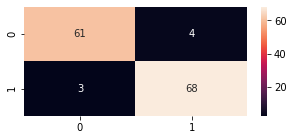

In [68]:
matrix1 = confusion_matrix(ytrain, ytrainpred)
plt.figure(figsize=(5,2))
heatmap = sns.heatmap(matrix1, annot=True)

In [59]:
(61+68) / (61+68+3+4)

0.9485294117647058

In [60]:
ytestpred = modelxx.predict(xtest)
ytestpred

78     0.858140
16     1.161807
151   -0.070825
79     0.739682
145   -0.047044
120   -0.095197
19     0.800667
130   -0.203451
73     1.179648
75     1.083600
101    0.058847
95     0.325537
147    0.271708
116   -0.008732
105   -0.204571
54     0.476166
163    0.013680
109    0.129946
9      0.264609
81     0.995988
112    0.210063
0      0.813394
11     0.738065
98     0.209489
69     0.351787
135    0.348715
97    -0.020585
115   -0.111952
155   -0.284344
114   -0.106608
71     1.227174
162   -0.152695
164    0.114814
137    0.331180
dtype: float64

In [61]:
round(ytestpred)

78     1.0
16     1.0
151   -0.0
79     1.0
145   -0.0
120   -0.0
19     1.0
130   -0.0
73     1.0
75     1.0
101    0.0
95     0.0
147    0.0
116   -0.0
105   -0.0
54     0.0
163    0.0
109    0.0
9      0.0
81     1.0
112    0.0
0      1.0
11     1.0
98     0.0
69     0.0
135    0.0
97    -0.0
115   -0.0
155   -0.0
114   -0.0
71     1.0
162   -0.0
164    0.0
137    0.0
dtype: float64

In [62]:
ytestpred.loc[ytestpred <= 0.5] = 0
ytestpred.loc[ytestpred >0.5] = 1
ytestpred

78     1.0
16     1.0
151    0.0
79     1.0
145    0.0
120    0.0
19     1.0
130    0.0
73     1.0
75     1.0
101    0.0
95     0.0
147    0.0
116    0.0
105    0.0
54     0.0
163    0.0
109    0.0
9      0.0
81     1.0
112    0.0
0      1.0
11     1.0
98     0.0
69     0.0
135    0.0
97     0.0
115    0.0
155    0.0
114    0.0
71     1.0
162    0.0
164    0.0
137    0.0
dtype: float64

In [63]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
165    0.0
166    0.0
167    0.0
168    0.0
169    0.0
Name: 54, Length: 170, dtype: float64

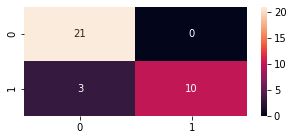

In [69]:
matrix2 = confusion_matrix(ytest, ytestpred)
plt.figure(figsize=(5,2))
heatmap = sns.heatmap(matrix2, annot=True)

In [65]:
(21+10) / (21+10+3+0)

0.9117647058823529

The accuracies are very similar.

### Problem 5
Plot the AUC ROC ( Area Under the Curve, Receiver Operating Characteristics) curve for the model with appropriate title and labels. Explain what the curve is telling you about the model.

In [71]:
metrics.roc_auc_score(ytrain, result.predict(xtrain))

0.9861321776814734

Text(0.5, 0, 'False Positive Rate')

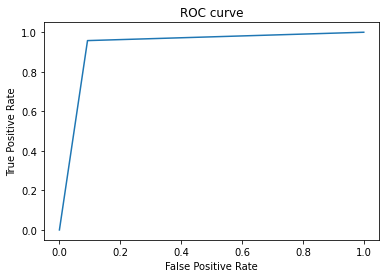

In [76]:
fpr, tpr, thresholds = metrics.roc_curve(ytrain, result.predict(xtrain).round())
plt.plot(fpr, tpr)
plt.title("ROC curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

The steeper degree of the curve, the more accurate the model is. That is because there are less false positive and negative values. 